# **Amazon Fine Food Reviews Analysis**
## Social Media Analytics for Business Intelligence
### Hult International Business School

#### TEAM 9:


*   Arabela Carceles
*   Diana Michelle Prieto Sanchez
*   Juan David Zuluaga
*   Lucas Sotkovszki Rodríguez
*   Raquel Silva


Canva Link: https://www.canva.com/design/DAGs5F2Iqys/O6vY0QyMXS9H0PzeLD-ZZQ/edit?utm_content=DAGs5F2Iqys&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

---












# IMPORTS


---



In case your computer doesn't have some packages installed, please run the first chunck. Otherwise, you can skip for Importing the Libraries.

In [53]:
#!pip uninstall -y numpy scipy thinc gensim
#!pip install numpy==1.26.4 scipy==1.13.1 gensim==4.3.3 scikit-learn thinc==8.3.6 --no-deps
!pip install squarify
!pip install vaderSentiment
!pip install --upgrade matplotlib seaborn scikit-learn gensim pandas # Runtime > restart session

In [54]:
#Import all the necessary libraries for the project
import kagglehub
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import sent_tokenize
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import numpy as np
from gensim import corpora
from gensim.models import LdaModel
import spacy
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from sklearn.feature_extraction.text import CountVectorizer
import gensim.matutils
import squarify
import matplotlib.cm as cm

#Downloads to increase the effectiveness of the imported libraries
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('vader_lexicon')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## LOAD DATASET

The objective of this group is to analyze a dataset with information about Amazon Reviews of fine foods  in all different categories. The dataset includes a brief summary, the entire text writen by the customer, the rating and some customer information. First, we load the dataset.

In [55]:
# Download latest version of the dataset
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-fine-food-reviews


In [56]:
#Load datset
file_path = "/kaggle/input/amazon-fine-food-reviews/Reviews.csv" #Simplified path to debug

df = pd.read_csv(file_path)

# Display basic info about the dataset
print("Initial dataset shape:", df.shape)
print("\nDataset columns:", df.columns)
print("\nFirst few rows:")
display(df.head())

Initial dataset shape: (568454, 10)

Dataset columns: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

First few rows:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# DATA CLEANING


---



### DATA BASE CLEANING

For better accuracy of the analysis, some cleaning is needed to be done. In this step, we check if there is any missing values and if there is any dupplicated row. As it is possible to see, the column Time is not showing the result expected for a measure of date/time, so we also need to correct it as well.

In [57]:
#Duplicated rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


In [58]:
#MISSING VALUES
missing_by_column = df.isna().sum()

print("Missing values by column:")
print(missing_by_column[missing_by_column > 0])

#Rows with just a missing values in the ProfileName do not affect the analysis.
#However, those with missing values in the Summary column, will affect it, so
#those are going to be removed
df = df.dropna(subset=['Summary'])

Missing values by column:
ProfileName    26
Summary        27
dtype: int64


We see now that are 27 missing values in the Summary column that could interfere in the analysis later.

In [59]:
# Convert the 'Time' column to a readable datetime format
#The numerical values of the Time column are numeric values UNIX type
#UNIX type refers to the number of seconds that have elapsed since 1/1/1970

df['review_date'] = pd.to_datetime(df['Time'], unit='s')
df['year'] = df['review_date'].dt.year

# Check result
print(df[['Time', 'review_date','year']].head())

         Time review_date  year
0  1303862400  2011-04-27  2011
1  1346976000  2012-09-07  2012
2  1219017600  2008-08-18  2008
3  1307923200  2011-06-13  2011
4  1350777600  2012-10-21  2012


/tmp/ipython-input-59-2007728493.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_date'] = pd.to_datetime(df['Time'], unit='s')


### NEW FEATURES

For better understand of our dataset, some columns would be added to make it easier for posterior analysis.

In [60]:
# Word count in summary
df['summary_length'] = df['Summary'].apply(lambda x: len(x.split()))
#Adjusted df['Summary'] as it was df['cleaned_summary'] and it was not available in the dataset as the df is cleaned beforehand

In [61]:
# Length of review in words
df['review_length'] = df['Text'].apply(lambda x: len(x.split()))
#Adjusted df['Text'] as it was df['cleaned_Text'] and it was not available in the dataset

In [62]:
# Number of exclamation marks (could signal emotion)
df['exclamations'] = df['Text'].apply(lambda x: str(x).count('!'))

In [63]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,review_date,year,summary_length,review_length,exclamations
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,2011,4,48,0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,2012,3,31,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,2008,4,94,0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,2011,2,41,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,2012,2,27,0


### FURTHER DATA PROCESSING (TOKENIZATION AND LEMMATIZATION)
Very Slow Process, Run only if needed

Now our text analysis begins. To proceed, we need to define some functions that we will use later. The columns we are most interested in are Summary and Text. As you may notice, the Summary column provides the keywords used in the review, while the Text column contains the full comment. It is important to analyze them separately, as they may lead to different insights.

In [64]:
#stop words CRUCIAL (NOT TO ERASE)
stop_words = set(stopwords.words('english'))

#Define function to clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text) # Changed x to text here
    text = word_tokenize(text)
    text = [word for word in text if word not in stop_words]
    return text

#Lemmatization function
def lemmatize_tokens(tokens):
    pos_tags = pos_tag(tokens)
    lemmatized_tokens = []
    for token, tag in pos_tags:
        pos = tag[0].lower()
        if pos in ['a', 'r', 'n', 'v']:
            lemmatized_tokens.append(lemmatizer.lemmatize(token, pos))
        else:
            lemmatized_tokens.append(lemmatizer.lemmatize(token))
    return lemmatized_tokens

#Bigram function
def generate_bigrams(tokens):
  bigrams = ngrams(tokens, 2)
  return list(bigrams)

#Trigrams function
def generate_trigrams(tokens):
  trigrams = ngrams (tokens, 3)
  return list(trigrams)

In [65]:
#Apply the defined functions and create columns
#Very slow  ----> BE PATIENT
# Use of Summary instead of Text for RAM constraints (THEY CAPTURE THE IDEA FOR TOPIC MODELING)
# We keep Text for sentiment
df['clean_summary'] = df['Summary'].apply(clean_text)
df['lemmatized_tokens'] = df['clean_summary'].apply(lemmatize_tokens)
df['bigrams'] = df['lemmatized_tokens'].apply(generate_bigrams)
df['trigrams'] = df['lemmatized_tokens'].apply(generate_trigrams)

### CHECK RESULTS

In [66]:
#Review of the new columns that have been created
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,review_date,year,summary_length,review_length,exclamations,clean_summary,lemmatized_tokens,bigrams,trigrams
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,2011,4,48,0,"[good, quality, dog, food]","[good, quality, dog, food]","[(good, quality), (quality, dog), (dog, food)]","[(good, quality, dog), (quality, dog, food)]"
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,2012,3,31,0,[advertised],[advertised],[],[]
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,2008,4,94,0,"[delight, says]","[delight, say]","[(delight, say)]",[]
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,2011,2,41,0,"[cough, medicine]","[cough, medicine]","[(cough, medicine)]",[]
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,2012,2,27,0,"[great, taffy]","[great, taffy]","[(great, taffy)]",[]


# DESCRIPTIVE ANALYSIS


---



Now, we prepared our dataset, we want to start analyzing. First we are gonna do some Descriptive Analysis for check if there are any interesting insight.

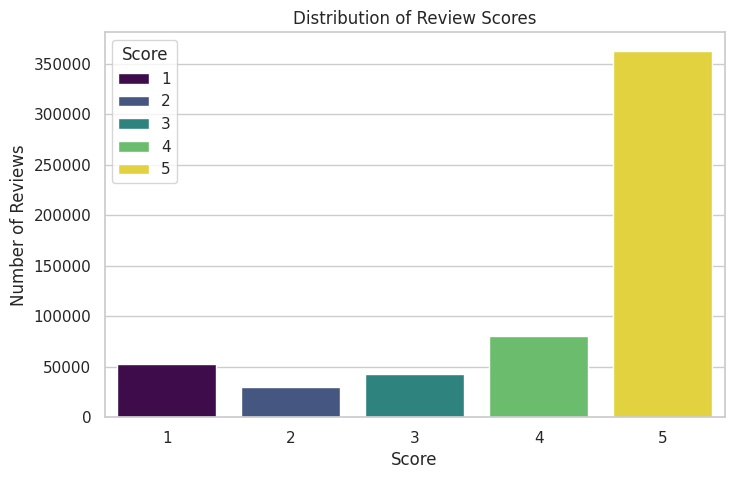

In [67]:
#Score distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Score', palette='viridis', hue='Score')
plt.title("Distribution of Review Scores")
plt.xlabel("Score")
plt.ylabel("Number of Reviews")
plt.show()

It is possible to confirm that the majority number of comments are when people like the fine food they both, rating with the higher grades.

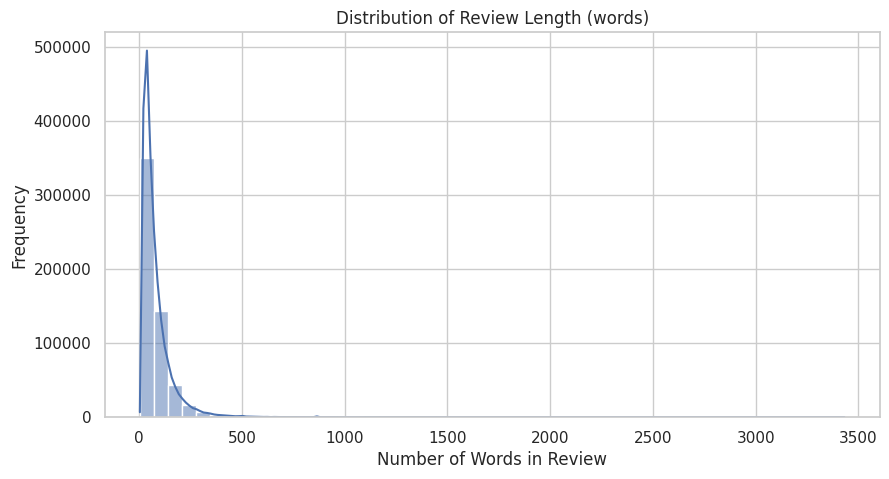

In [68]:
# Distribution of Text and Summary lengths
df['review_length'] = df['Text'].apply(lambda x: len(str(x).split()))
df['summary_length'] = df['Summary'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Length (words)")
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.show()


The majority of reviews are small, not using many words. Customers generally goes straight to the point.

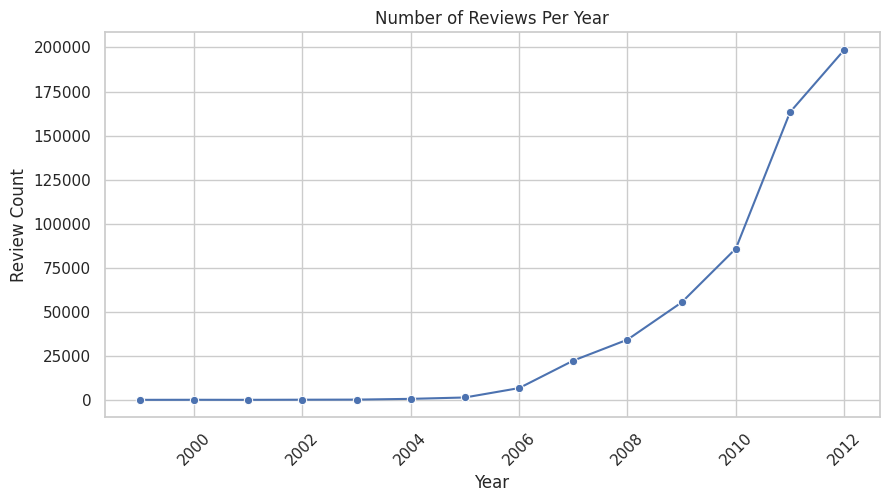

In [69]:
#Number of reviews over time
reviews_per_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=reviews_per_year.index, y=reviews_per_year.values, marker='o')
plt.title("Number of Reviews Per Year")
plt.xlabel("Year")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [70]:
#Check of the exact number of reviews of each year
print(df['year'].value_counts().sort_index())
#Allows to see a clearer distribution

year
1999         6
2000        32
2001        13
2002        73
2003       132
2004       561
2005      1335
2006      6671
2007     22275
2008     34163
2009     55326
2010     85884
2011    163299
2012    198657
Name: count, dtype: int64


### Demographics

In [71]:
# Total number of unique users
num_users = df['UserId'].nunique()
print(f"Number of unique users: {num_users}")


Number of unique users: 256056


In [72]:
# Top 10 most active users (by number of reviews)
top_users = df['UserId'].value_counts().head(10)
print("\nTop 10 most active users:")
print(top_users)



Top 10 most active users:
UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
Name: count, dtype: int64


Now we want to see another measure. The dataset contains 2 different columns that are possible to combine (Helpfullnees Nukmerator and Denominator). With this, it is possible to create a rate to say if people are finding the reviews helpfull or not. It is also possible to see if people reacts more to positive or negative comments later.

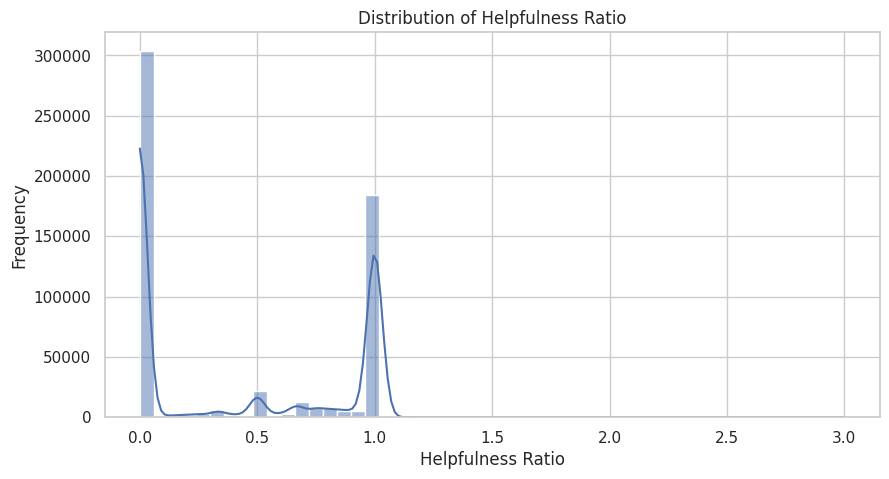

In [73]:
# Create a new feature: helpfulness ratio
df['helpfulness_ratio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
df['helpfulness_ratio'] = df['helpfulness_ratio'].fillna(0)  # handle division by zero

# Plot helpfulness ratio distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['helpfulness_ratio'], bins=50, kde=True)
plt.title("Distribution of Helpfulness Ratio")
plt.xlabel("Helpfulness Ratio")
plt.ylabel("Frequency")
plt.show()


In [74]:
# Correlation between review length and helpfulness
corr = df[['review_length', 'HelpfulnessNumerator']].corr()
print("\nCorrelation between review length and helpfulness votes:")
print(corr)


Correlation between review length and helpfulness votes:
                      review_length  HelpfulnessNumerator
review_length              1.000000              0.169327
HelpfulnessNumerator       0.169327              1.000000


I want to see if people reacts more (think the review was usefull) when the score is good or not.

/tmp/ipython-input-75-1541074990.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='helpfulness_ratio', data=avg_helpfulness, palette='viridis')


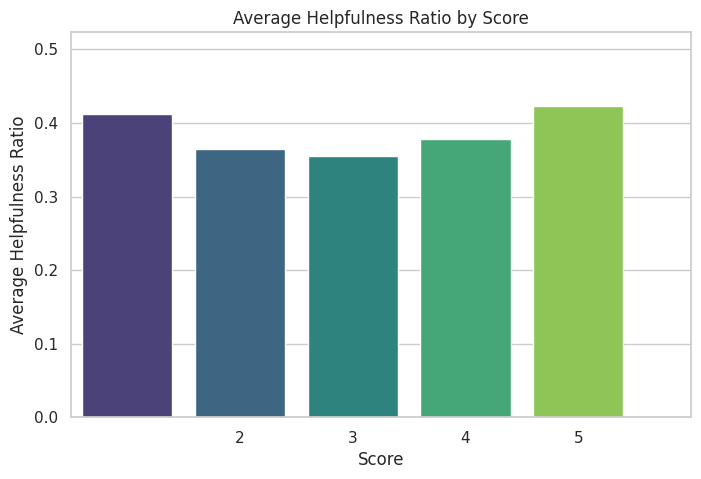

In [75]:
# Calculate the average helpfulness ratio by score
avg_helpfulness = df.groupby('Score')['helpfulness_ratio'].mean().reset_index()

# Filter the scores to only include 1, 2, 3, 4, 5
avg_helpfulness = avg_helpfulness[avg_helpfulness['Score'].isin([1, 2, 3, 4, 5])]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Score', y='helpfulness_ratio', data=avg_helpfulness, palette='viridis')

# Add titles and labels
plt.title('Average Helpfulness Ratio by Score')
plt.xlabel('Score')
plt.ylabel('Average Helpfulness Ratio')

# Show the plot
plt.xticks([1, 2, 3, 4, 5])  # Set x-axis ticks
plt.ylim(0, avg_helpfulness['helpfulness_ratio'].max() + 0.1)  # Adjust y-axis limit for better visualization
plt.show()

### DESCRIPTIVE ANALYSIS CONCLUSIONS
After performing the descriptive data analysis, patterns and characteristics of the dataset have been identified.

First, the distribution of review scores is highly imbalanced, with the majority of reviews receiving a score of 5. In contrast, very few reviews are rated with low scores such as 1 or 2. This suggests a strong bias toward positive evaluations.

Regarding the content of the reviews, most of them are relatively short, usually between 20 and 100 words, although there are some extreme outliers with more than 1000 or even 3000 words. The distribution is heavily right-skewed. This should be taken into account when applying text analysis techniques so that outliers do not influence the analysis.

In terms of time trends, the number of reviews has increased significantly over the years. The growth becomes especially notable starting from 2006 and continues to rise until 2012, where it reaches its peak with more than 200,000 reviews. This trend may reflect the growth of e-commerce platforms and social engagement during that period, which is relevant for analyzing changes in user behavior. This also reflects the start of Amazon Fresh in 2007, that may contributed for the increase number of reviews once the program started growing.

The analysis of user activity shows that while there are over 250,000 unique users, most users post only a small number of reviews. However, there are a few highly active users who have submitted hundreds of reviews. These users may influence the overall statistics and could be further examined to see if they display specific patterns, such as consistently positive or negative comments.

Additionally, the helpfulness ratio, which is calculated from the helpfulness votes, presents a bimodal distribution. Most reviews are either rated as not helpful at all or completely helpful. When comparing the length of a review with its number of helpfulness votes, a weak positive correlation is observed. This suggests that longer reviews tend to be perceived as slightly more helpful, although the effect is not very strong.

In conclusion, the dataset reveals strong patterns in user engagement, review quality, and content characteristics. These findings will be important to consider in later stages of analysis, especially when applying sentiment analysis or topic modeling techniques.

# ANALYTICAL TECHNIQUES


---



## SENTIMENT ANALYSIS

### TRAINING

Now, analyzing the Text Column, we want to understand the overall sentiment that is possible to get out of it. For that, we use the Vader.

In [76]:
#Find Sentiment- Very Consuming for computer power
df['vader_polarity'] = df['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [77]:
#Find the average sentiment of the reviews
average_polarity = df['vader_polarity'].mean().round(2)
print("Average Vader polarity for the entire dataset: ", {average_polarity})

Average Vader polarity for the entire dataset:  {0.66}


 Since polarity scores range from -1 (completely negative) to +1 (completely positive), a mean value of 0.66 suggests that the general tone of the reviews is positive overall. This aligns with earlier findings from the score distribution, where most reviews were rated with high scores. However, it is important to note that the polarity is not extremely high, which indicates that although the reviews tend to be favourable, they may still contain critical or neutral elements in the language.

In [78]:
# Once we have the polarities, they are going to be classified as Positive, Negative or Neutral. We do this for all the reviews of the dataset
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_sentiment'] = df['vader_polarity'].apply(classify_sentiment)

In [79]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,summary_length,review_length,exclamations,clean_summary,lemmatized_tokens,bigrams,trigrams,helpfulness_ratio,vader_polarity,vader_sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,...,4,48,0,"[good, quality, dog, food]","[good, quality, dog, food]","[(good, quality), (quality, dog), (dog, food)]","[(good, quality, dog), (quality, dog, food)]",1.0,0.9441,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,3,31,0,[advertised],[advertised],[],[],0.0,-0.5664,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,...,4,94,0,"[delight, says]","[delight, say]","[(delight, say)]",[],1.0,0.8138,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,...,2,41,0,"[cough, medicine]","[cough, medicine]","[(cough, medicine)]",[],1.0,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,...,2,27,0,"[great, taffy]","[great, taffy]","[(great, taffy)]",[],0.0,0.9468,Positive


### ADDITIONAL ANALYSIS

**Top 10 Most Active Users** (Sample Size)

As mentioned before, it would be interesting to see if those top rating users display any patterns when writing reviews. To check it, and using TextBlob the goal is to analyse the sentiment of the reviews, and then check for those top users if they show general tendencies

In [80]:
# Get top 10 users by number of reviews, in order
top_users = df['UserId'].value_counts().head(10)
top_user_ids = top_users.index  # list of UserIds in correct order
# Filter only their reviews
top_users_df = df[df['UserId'].isin(top_user_ids)]
#Group by UserId and Vader sentiment label
sentiment_counts = top_users_df.groupby(['UserId', 'vader_sentiment']).size().unstack(fill_value=0)

In [81]:
#Calculate percentages of the reviews
sentiment_counts['Total'] = sentiment_counts.sum(axis=1)
sentiment_counts['% Positive'] = sentiment_counts['Positive'] / sentiment_counts['Total'] * 100
sentiment_counts['% Neutral'] = sentiment_counts['Neutral'] / sentiment_counts['Total'] * 100
sentiment_counts['% Negative'] = sentiment_counts['Negative'] / sentiment_counts['Total'] * 100

# Step 5: Reorder based on actual top 10 users
sentiment_counts = sentiment_counts.loc[top_user_ids]

# View result
sentiment_counts

vader_sentiment,Negative,Neutral,Positive,Total,% Positive,% Neutral,% Negative
UserId,,,,,,,
A3OXHLG6DIBRW8,8,7,433,448,96.651786,1.562500,1.785714
A1YUL9PCJR3JTY,0,0,421,421,100.000000,0.000000,0.000000
AY12DBB0U420B,12,3,374,389,96.143959,0.771208,3.084833
A281NPSIMI1C2R,8,0,357,365,97.808219,0.000000,2.191781
A1Z54EM24Y40LL,6,1,249,256,97.265625,0.390625,2.343750
A1TMAVN4CEM8U8,7,2,195,204,95.588235,0.980392,3.431373
A2MUGFV2TDQ47K,16,2,183,201,91.044776,0.995025,7.960199
A3TVZM3ZIXG8YW,0,0,199,199,100.000000,0.000000,0.000000
A3PJZ8TU8FDQ1K,0,7,171,178,96.067416,3.932584,0.000000


The results indicate that most of the top users tend to write predominantly positive reviews. For instance, the most active user (A3OXHLG6DIBRW8) wrote 448 reviews, of which around 96.6% were classified as positive. Although this percentage is relatively high, it is not as strong as some of the others in the list. Several other users such as A1YUL9PCJR3JTY, AY12DBB0U420B, and A3TVZM3ZIXG8YW have over 90% of their reviews identified as positive, with almost no negative ones at all. This could indicate a generally favourable attitude in their writing style, or a possible alignment with product satisfaction.

The proportion of negative reviews is very low across all users in this top group. In some cases, the percentage of negative reviews is zero, which may reflect a natural bias toward positive expression, or possibly even non-organic review behaviour in a few cases.

One particular user (A3TVZM3ZIXG8YW) wrote 199 reviews, and all of them were classified as positive. This extreme case could be interpreted in two ways: either the user is genuinely satisfied with every product, or it might represent automated or promotional reviewing activity.



**Full User Population**

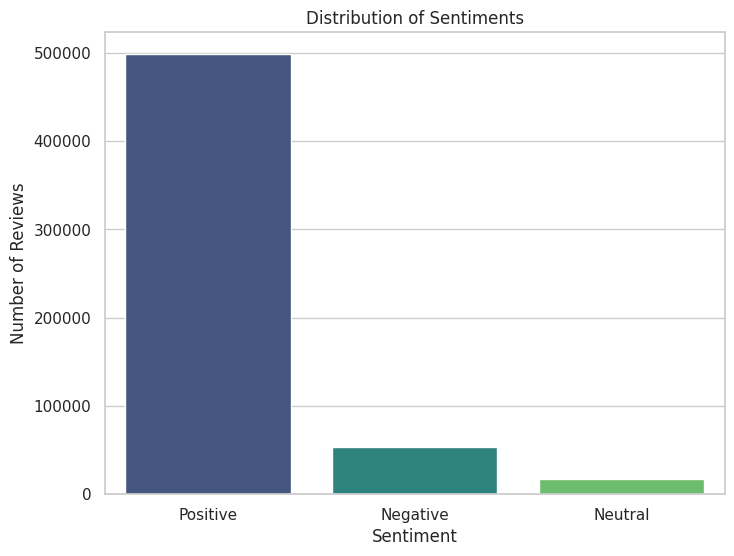

In [82]:
# Count the occurrences of each sentiment label
sentiment_counts_all = df['vader_sentiment'].value_counts()

# Plotting the sentiment counts for the entire dataset
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts_all.index, y=sentiment_counts_all.values, palette='viridis', hue=sentiment_counts_all.index)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [83]:
#Find the ratios of total sentiment count
sentiment_ratios = sentiment_counts_all / sentiment_counts_all.sum()*100
print("Vader sentiment as % from total reviews")
sentiment_ratios

Vader sentiment as % from total reviews


,count
vader_sentiment,
Positive,87.689712
Negative,9.338050
Neutral,2.972237


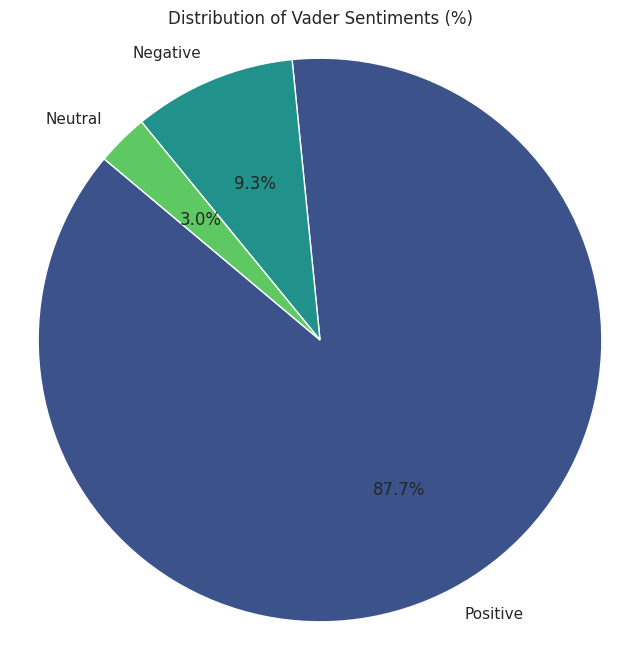

In [84]:
# Graphing the sentiment ratios
plt.figure(figsize=(8, 8))
plt.pie(sentiment_ratios, labels=sentiment_ratios.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(sentiment_ratios)))
plt.title('Distribution of Vader Sentiments (%)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

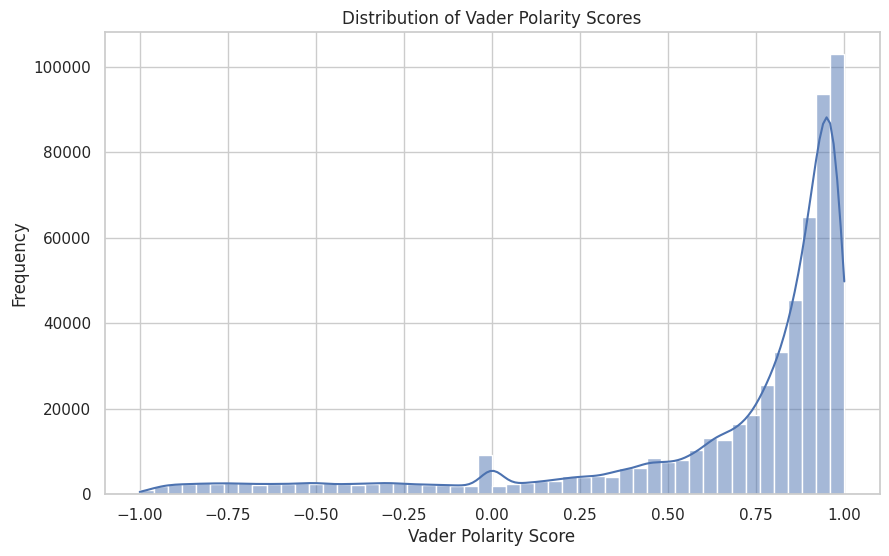

In [85]:
# prompt: histogram for vader_polarity

plt.figure(figsize=(10, 6))
sns.histplot(df['vader_polarity'], bins=50, kde=True)
plt.title("Distribution of Vader Polarity Scores")
plt.xlabel("Vader Polarity Score")
plt.ylabel("Frequency")
plt.show()

Similarly to the sample size it is found that the majority of users have a positive sentiment in regards to the products offered with a 88%, followed by negatice sentiment of the products with a 9% and lastly there is a 3% of neutral reviews.
An 9% is not scandalous, nonetheless it does not relate with the sample review as it is not surpassed by any of the users; possibly hinting that there is a problem as the entire population negative score outperforms top 10 more engaged user and we could lose volume users

**Unique Score by User**

Summary statistics of average Vader polarity per user (unique):
count    256056.000000
mean          0.632175
std           0.450185
min          -0.997400
25%           0.536200
50%           0.826400
75%           0.926679
max           0.999800
Name: vader_polarity, dtype: float64


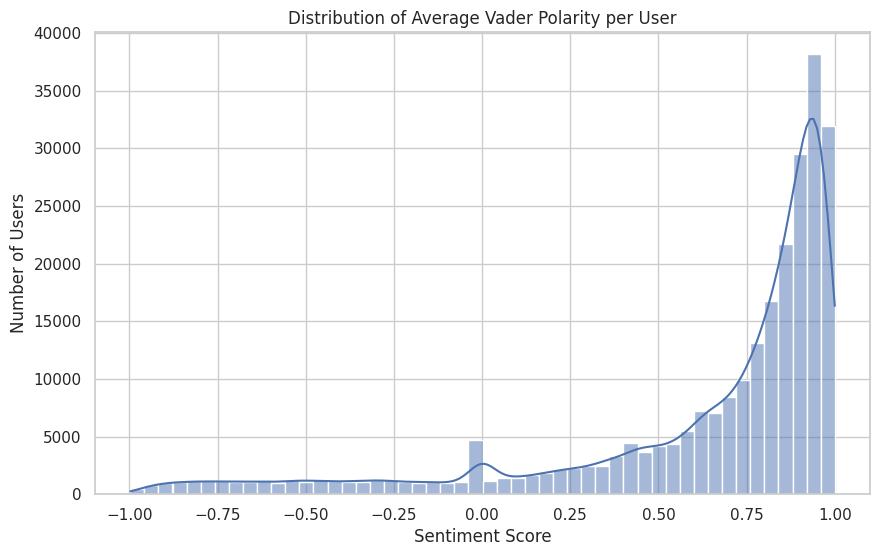

In [86]:
# Group by 'UserId' and calculate the mean 'vader_polarity' for each user
user_sentiment_scores = df.groupby('UserId')['vader_polarity'].mean().reset_index()

# Display summary statistics of user sentiment scores
print("Summary statistics of average Vader polarity per user (unique):")
print(user_sentiment_scores['vader_polarity'].describe())

# Plot the distribution of average Vader polarity per user
plt.figure(figsize=(10, 6))
sns.histplot(user_sentiment_scores['vader_polarity'], bins=50, kde=True)
plt.title("Distribution of Average Vader Polarity per User")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Users")
plt.show()

By analyzing the histogram distribution of textblob polarity scores and the describe data it is possible to see that the 4 quartiles represent positive sentiment scores. Meaning that the 9% of negative scores are normal outliers.

**Sentiment Analysis over time**

Now we want to see if the sentiment is changing over time or if the tendency reflects the data we already found.

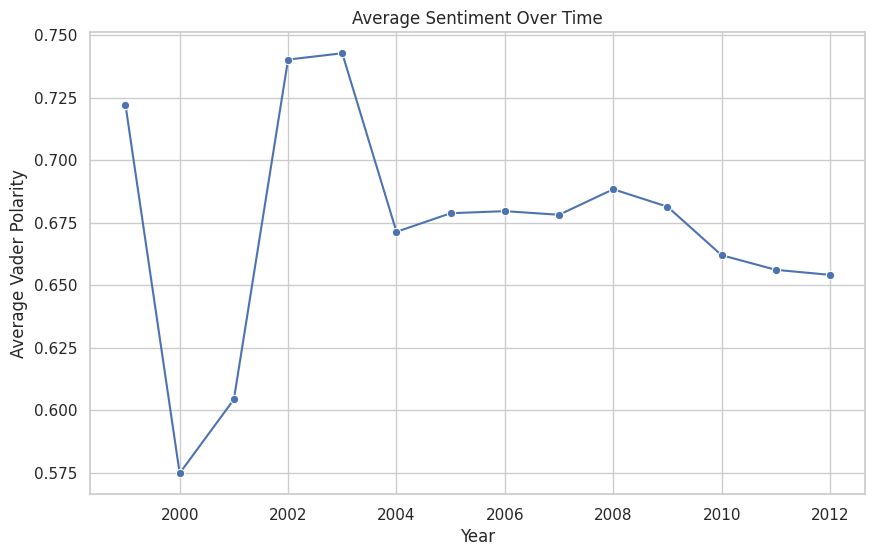

In [87]:
# Group by year and average sentiment to find the sentiment score over time
sentiment_over_time = df.groupby('year')['vader_polarity'].mean().reset_index()

# Plot the average sentiment over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=sentiment_over_time, x='year', y='vader_polarity', marker='o')
plt.title('Average Sentiment Over Time')
plt.xlabel('Year')
plt.ylabel('Average Vader Polarity')
plt.grid(True)
plt.show()

Reviews positivity started high but began slowly decreasing to a more postive-neutral sentiment with the pace of the time as the users had more time to experiment with the product and the initial hype is diminished


##TOPIC MODELING

### GRAPHIC REPRESENTATION OF WORD CLOUDS (+ DESCRIPTIVE)

Now we want to see what are the most common wordsused in the Summary Column. It is important to remember that the column was already tokenized and lemmatized, all stop words were removed. One of the things that removing stop words do is exclude some negative words as 'not', 'don't', 'doesn't'... That's the reason this analysis need to come after the sentiment one, where the entire text were considered.

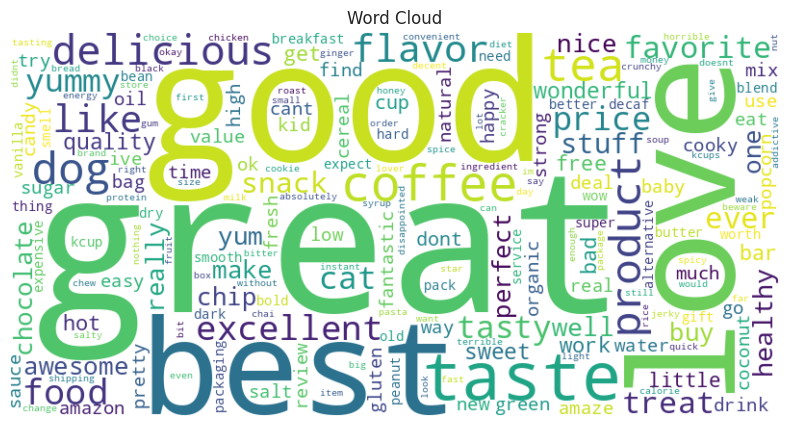

In [88]:
# Flatten tokens and bigrams
all_words= [word for sublist in df['lemmatized_tokens'] for word in sublist]
all_bigrams = [bigram for sublist in df['bigrams'] for bigram in sublist]
all_trigrams = [trigram for sublist in df['trigrams'] for trigram in sublist]

# Frequency counters
word_freq= Counter(all_words)
bigram_freq = Counter(all_bigrams)
trigram_freq = Counter(all_trigrams)

# Prepare dicts
word_freq_dict = dict(word_freq)
ngram_freq_dict = {'_'.join(bigram): count for bigram, count in bigram_freq.items()}
trigram_freq_dict = {'_'.join(trigram): count for trigram, count in trigram_freq.items()}

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
ngramcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngram_freq_dict)
trigramcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(trigram_freq_dict)

# Plot Lemmatized
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

The most used words are positive and representative of the snacks, finding also reviews for dog related products

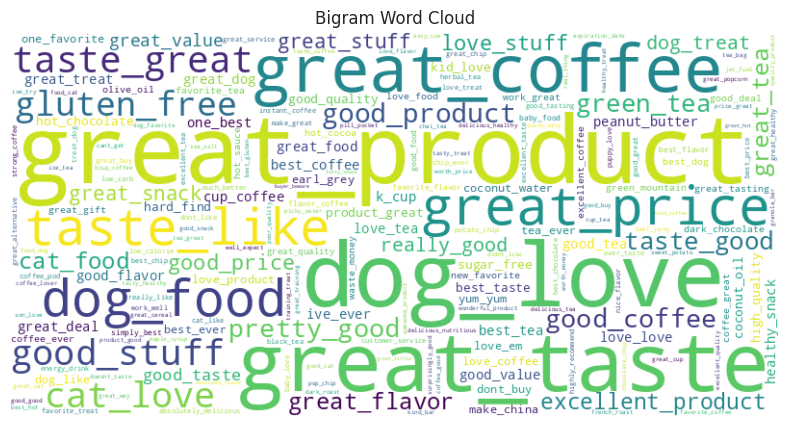

In [89]:
# Plot Bigrams
plt.figure(figsize=(10, 5))
plt.imshow(ngramcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bigram Word Cloud')
plt.show()

In bigrams it is more clear that users are reviewing dog and cat food at the same time some human water products are being reviewed

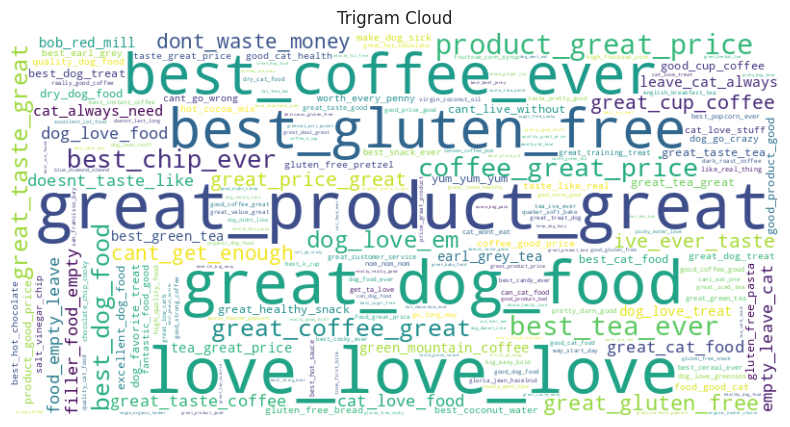

In [90]:
plt.figure(figsize=(10, 5))
plt.imshow(trigramcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Trigram Cloud')
plt.show()

Through the trigrams it is possible to see that the reviews are mostly based on emotions and are repetitive with its wordings, emphasizing the likeleness from the user of the product. They emphasize: flavor, price and likeness

### TRAINING FOR TOPIC MODELING

Training a Model is a fundamental part of the analysis to help identify and confirm the most important subjects talked about in some Text Mining. In this part, we are going to use LDA and Bag of Words for that. We want to make sure that our most important topics appears as the ones we already saw in the Graphs before. Since the dataset is big, we are gonna focus of the top 5 topics for this.

In [91]:
# Create a dictionary from the cleaned summary

# Use the 'clean_summary' column from the dataframe as the document, its already clean less computing power
documents = df['clean_summary'].apply(lambda tokens: ' '.join(tokens)).tolist()

threshold = int(len(df) * 0.01)
count_vec = CountVectorizer(ngram_range=(1, 2))
X_bow = count_vec.fit_transform(documents)

# Create a bag-of-words corpus
corpus = gensim.matutils.Sparse2Corpus(X_bow, documents_columns=False)

for doc in corpus[:10]: #Done this way for computing power
    print(list(doc))

[(125532, 1), (239420, 1), (83132, 1), (112406, 1), (127777, 1), (239625, 1), (83360, 1)]
[(2836, 1)]
[(77180, 1), (257258, 1), (77223, 1)]
[(65666, 1), (187655, 1), (65677, 1)]
[(131655, 1), (289155, 1), (135031, 1)]
[(289155, 1), (202242, 1), (203072, 1)]
[(125532, 1), (131655, 1), (98836, 1), (34290, 1), (133075, 1), (126448, 1), (98866, 1)]
[(289155, 1), (326465, 1), (293579, 1), (327178, 1), (294643, 1)]
[(331131, 1), (18753, 1), (331136, 1)]
[(83132, 1), (112406, 1), (83360, 1), (142117, 1), (142299, 1)]


In [92]:
bow= count_vec.get_feature_names_out()
id_word = {i: word for i, word in enumerate(bow)}
id_word

{0: '__',
 1: '____',
 2: '____ cheese',
 3: '______',
 4: '__________its',
 5: '__________its alive_______________its',
 6: '_not_',
 7: '_not_ dry',
 8: '_very_',
 9: '_very_ good',
 10: '_very_ high',
 11: '_very_ little',
 12: 'aa',
 13: 'aa blend',
 14: 'aa coffee',
 15: 'aa cups',
 16: 'aa flights',
 17: 'aa healthy',
 18: 'aa kcup',
 19: 'aa kcups',
 20: 'aa kenyaexceptional',
 21: 'aa nd',
 22: 'aa need',
 23: 'aa oz',
 24: 'aa relaxed',
 25: 'aa whole',
 26: 'aa yawn',
 27: 'aaa',
 28: 'aaa jerkyawesome',
 29: 'aaa rating',
 30: 'aaaa',
 31: 'aaaaa',
 32: 'aaaaaaaaaaaa',
 33: 'aaaaaaaaaaacccckkkkk',
 34: 'aaaaaaaaaaacccckkkkk price',
 35: 'aaaaaaaaaaahhhhhhhhhhhhh',
 36: 'aaaaaaaaaaahhhhhhhhhhhhh ssssssooooooooo',
 37: 'aaaaaaggggggghhhhhhhh',
 38: 'aaaaaagggghhhh',
 39: 'aaaaaagggghhhh awful',
 40: 'aaaaaagh',
 41: 'aaaaaagh better',
 42: 'aaaaaamazing',
 43: 'aaaaahhh',
 44: 'aaaaahhh bisto',
 45: 'aaaah',
 46: 'aaaah relief',
 47: 'aaaahhh',
 48: 'aaaahhhh',
 49: 'aaaahhhh 

In [93]:
# Train the LDA model
# Changed ldamodel for ldamulticore as its way faster and analyzes at times
# Approx 13 min
lda_model = LdaMulticore(
    corpus=corpus,
    id2word=id_word,
    num_topics=5,
    passes=4,      # Lower = faster
    workers=2,       # Adjust to your CPU (FOR THE TEAM, MACBOOK SHOULD REMAIN LOW)
    chunksize=1000,  # test for the training is the same as threshold
    random_state=2) #For consistency

# Print the topics
print("LDA Topics:")
for idx, topic in lda_model.print_topics(-1): # Corrected variable name from lda to lda_model
    print(f"Topic #{idx + 1}: {topic}") #Shows probability of word in the topic

LDA Topics:
Topic #1: 0.040*"product" + 0.036*"great" + 0.026*"excellent" + 0.023*"tea" + 0.022*"tasty" + 0.014*"great product" + 0.013*"awesome" + 0.012*"perfect" + 0.010*"love" + 0.007*"cats"
Topic #2: 0.039*"delicious" + 0.027*"dog" + 0.019*"great" + 0.017*"loves" + 0.015*"flavor" + 0.015*"snack" + 0.011*"treats" + 0.009*"free" + 0.008*"food" + 0.008*"wonderful"
Topic #3: 0.027*"great" + 0.024*"yummy" + 0.020*"favorite" + 0.019*"taste" + 0.016*"food" + 0.014*"dogs" + 0.012*"hot" + 0.011*"chocolate" + 0.009*"amazing" + 0.008*"love"
Topic #4: 0.088*"good" + 0.056*"great" + 0.027*"coffee" + 0.017*"tea" + 0.013*"price" + 0.011*"yum" + 0.011*"stuff" + 0.010*"flavor" + 0.010*"better" + 0.008*"bad"
Topic #5: 0.059*"best" + 0.031*"love" + 0.019*"like" + 0.017*"ever" + 0.014*"coffee" + 0.008*"one" + 0.007*"chips" + 0.007*"tastes" + 0.007*"taste" + 0.006*"dont"


/tmp/ipython-input-94-1974816905.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(cmap_name)(norm(sizes))


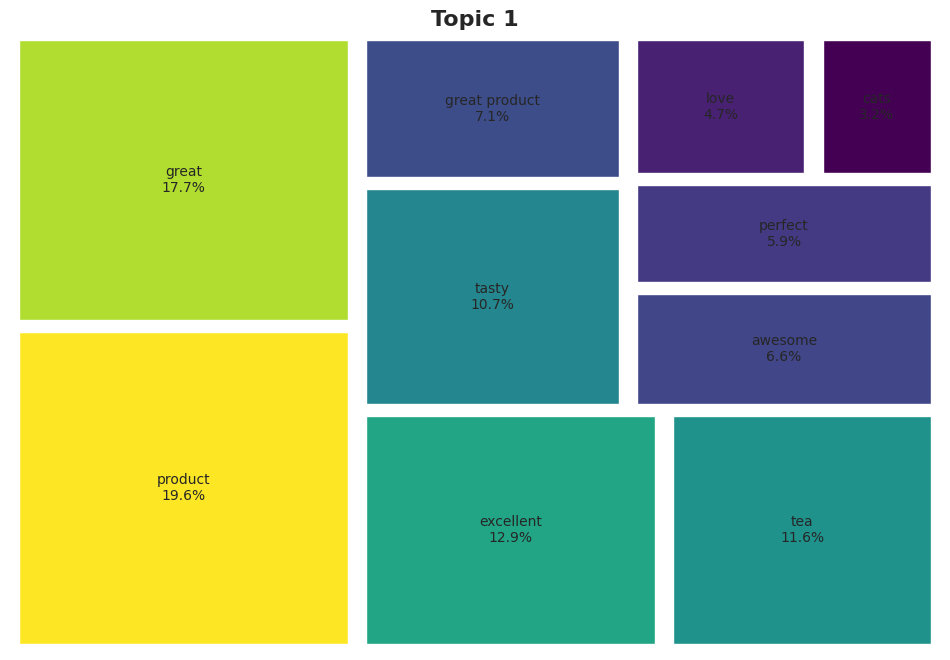

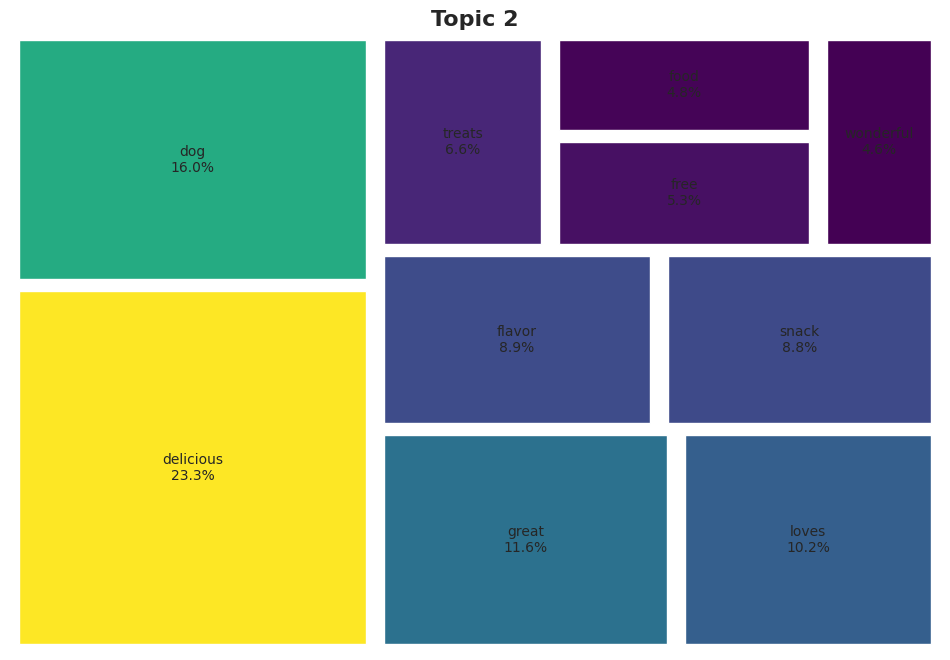

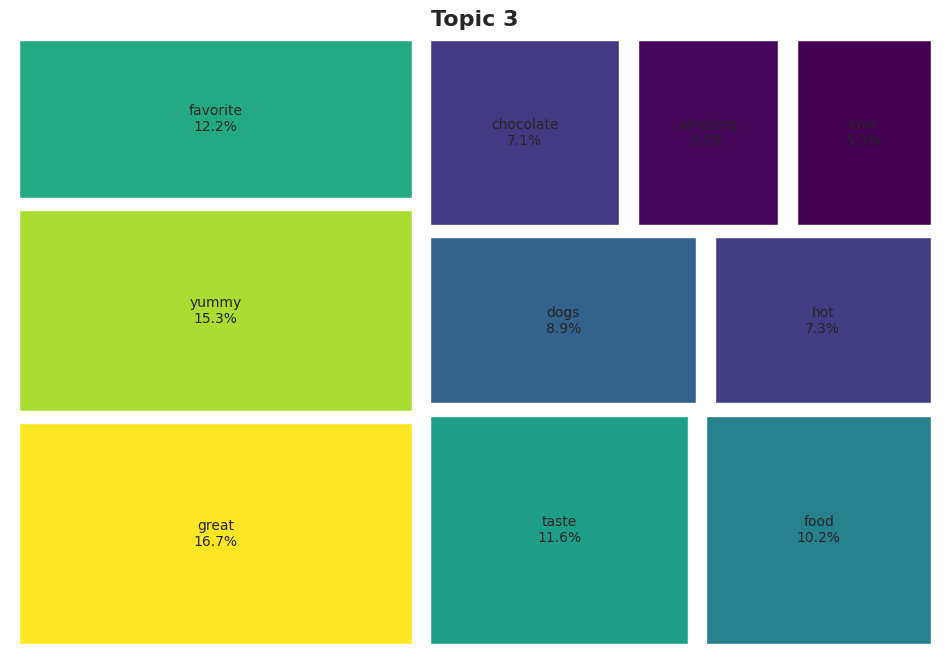

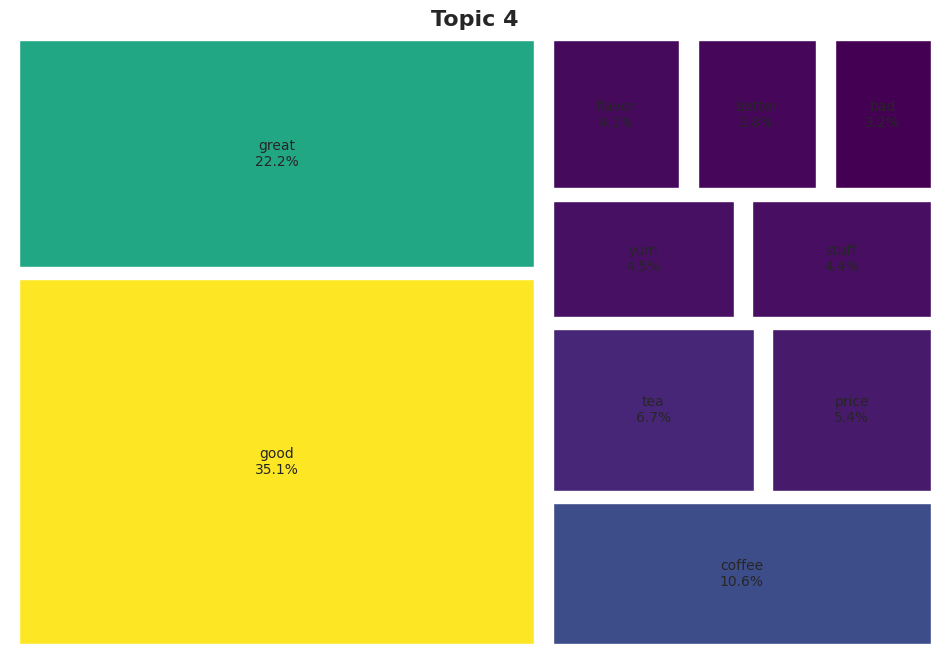

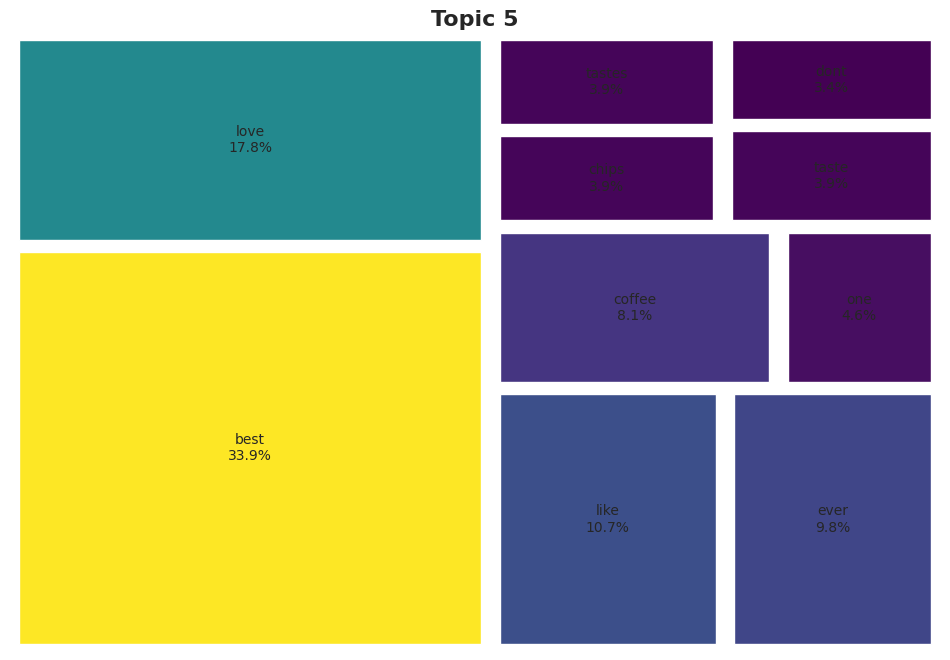

In [94]:
# Top 10 words per topic
topics = lda_model.show_topics(num_topics=-1, formatted=False, num_words=10)

word_freqs = [
    {word: weight for word, weight in topic_terms}
    for _, topic_terms in topics
]

# Treemap
def plot_treemap(word_freq, topic_id, cmap_name='viridis'):
    # sort largest first
    items  = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    labels = [f"{w}\n{p*100:.1f}%" for w, p in items]     # label + percent
    sizes  = [p for _, p in items]

    # normalize weights to 0-1 for the colormap
    norm   = plt.Normalize(vmin=min(sizes), vmax=max(sizes))
    colors = cm.get_cmap(cmap_name)(norm(sizes))

    # draw treemap
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, color=colors, pad=True, text_kwargs={'fontsize':10})
    plt.title(f"Topic {topic_id}", fontsize=16, weight='bold')
    plt.axis('off')
    plt.show()

# Plot every topic
for idx, freq_dict in enumerate(word_freqs, start=1):
    # rescale weights within the topic to proportions for nicer percentages
    total = sum(freq_dict.values())
    freq_dict = {w: v / total for w, v in freq_dict.items()}
    plot_treemap(freq_dict, idx)

What is possible to interpret is that:
Topic 1= Excellent products, making emphasis on the tea.
Topic 2= Every day snacks and dog food. Topic 3=favorite food and dog. Topic 4= cofee and tee, pricing (mixture of good and bad experiences)
Topic 5= The best in products and preference to buy

### DOMINANT TOPICS

In [95]:
#Dominant topic to each review
def get_dominant_topic(lda_model, corpus_item):
    topics = lda_model.get_document_topics(corpus_item, minimum_probability=0.0)
    topics.sort(key=lambda x: x[1], reverse=True)
    if topics:
        return topics[0][0] + 1, topics[0][1]
    return None, None

#Apply to the database
df['dominant_topic'], df['topic_probability'] = zip(*[get_dominant_topic(lda_model, item) for item in corpus])

#Print results
print("\nDataFrame with dominant topic:")
display(df[['clean_summary', 'dominant_topic', 'topic_probability']].head())


DataFrame with dominant topic:


,clean_summary,dominant_topic,topic_probability
0,"[good, quality, dog, food]",2,0.774647
1,[advertised],5,0.599950
2,"[delight, says]",5,0.737370
3,"[cough, medicine]",1,0.549863
4,"[great, taffy]",4,0.739973


5 dominant topics were identified, every topic composed by representative words, every review has a high probability of belonging to the dominant topic, especially to the topic 2. Nonehteless, topic 1 has a lower probability indicating it might be subjective opinions and could fit in other categories

## COMBINATION SENTIMENT+TOPIC MODELING


Sentiment Distribution within each Dominant Topic:
vader_sentiment  Negative  Neutral  Positive
dominant_topic                              
1                   10126     3354     97211
2                   10756     3421    100146
3                    9650     3110     92551
4                   10957     3668    109682
5                   11591     3342     98862

Sentiment Distribution within each Dominant Topic (%):
vader_sentiment   Negative   Neutral   Positive
dominant_topic                                 
1                 9.147989  3.030057  87.821955
2                 9.408430  2.992399  87.599171
3                 9.163335  2.953158  87.883507
4                 8.814467  2.950759  88.234774
5                10.185861  2.936860  86.877279


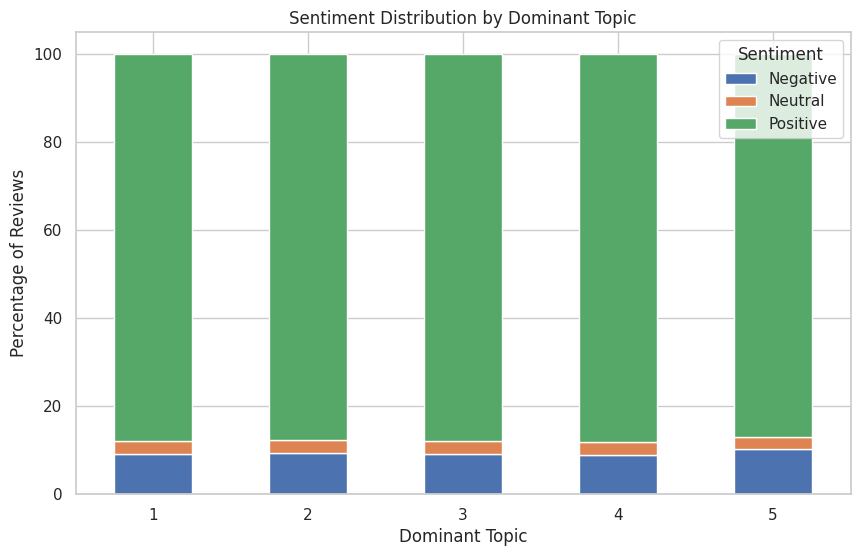

In [96]:
# Group by dominant topic and sentiment, then count the occurrences
sentiment_by_topic = df.groupby(['dominant_topic', 'vader_sentiment']).size().unstack(fill_value=0)

# Calculate the percentage of each sentiment within each topic
sentiment_by_topic_percent = sentiment_by_topic.apply(lambda x: x / x.sum(), axis=1) * 100

# Display the results
print("\nSentiment Distribution within each Dominant Topic:")
print(sentiment_by_topic)
print("\nSentiment Distribution within each Dominant Topic (%):")
print(sentiment_by_topic_percent)

# Visualization
sentiment_by_topic_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Dominant Topic')
plt.xlabel('Dominant Topic')
plt.ylabel('Percentage of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()

Sentiment is pretty consistent across all topics, with around 88% positive feedback overall. People are generally happy regardless of the topic.

Topic 5 shows the highest negativity because it’s about the “best-rated” products, where customers feel more justified to voice complaints.

Topic 1 is the most positive, likely tied to genuinely impressive ideas or products.

Topic 4 has more neutral sentiment, which makes sense since it focuses on pricing—a more practical and less emotional subject.

In short, sentiment stays steady, but these small differences reflect reality: top-rated products get more criticism, innovative ideas get praise, and pricing discussions lead to balanced opinions.



##Conclusions

After all this analysis, it is possible to conclude that customers are more likely to leave reviews when they have had a positive experience, and others tend to find these positive comments more helpful. We also observe a trend of increasing review volume, which reflects the growing number of customers using Amazon’s refined food category after the launch of Amazon Fresh. Customers use the platform for a wide variety of food types, from snacks to pet food, and overall, the perception remains positive.

One key insight from this analysis is the need to capture important reviews from customers who had negative experiences, as the dataset is currently unbalanced. To address this, Amazon could implement a review prompt immediately after product delivery, similar to the Uber system. This approach could increase the number of reviews and encourage customers to share what they didn’t like, as they would be giving feedback in the moment.

# Appendix: Codes for improving the presentation

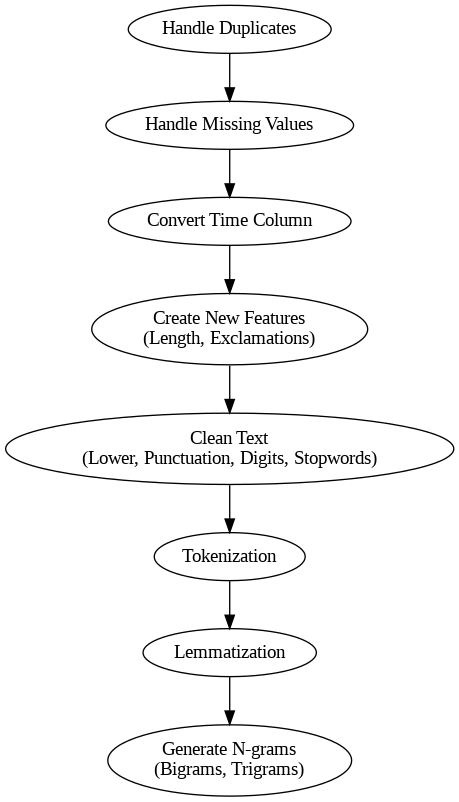

In [97]:
# prompt: create a flow chart showing the cleaning steps, or icons representing each step.

from graphviz import Digraph

dot = Digraph(comment='Data Cleaning Flow')

# Define nodes with icons or text
dot.node('B', 'Handle Duplicates')
dot.node('C', 'Handle Missing Values')
dot.node('D', 'Convert Time Column')
dot.node('E', 'Create New Features\n(Length, Exclamations)')
dot.node('F', 'Clean Text\n(Lower, Punctuation, Digits, Stopwords)')
dot.node('G', 'Tokenization')
dot.node('H', 'Lemmatization')
dot.node('I', 'Generate N-grams\n(Bigrams, Trigrams)')


# Define edges to show flow
dot.edge('B', 'C')
dot.edge('C', 'D')
dot.edge('D', 'E')
dot.edge('E', 'F')
dot.edge('F', 'G')
dot.edge('G', 'H')
dot.edge('H', 'I')

# Render the flow chart
dot.render('data_cleaning_flowchart', view=True, format='png')

# You can display it directly in the notebook if you prefer
from IPython.display import Image
Image('data_cleaning_flowchart.png')

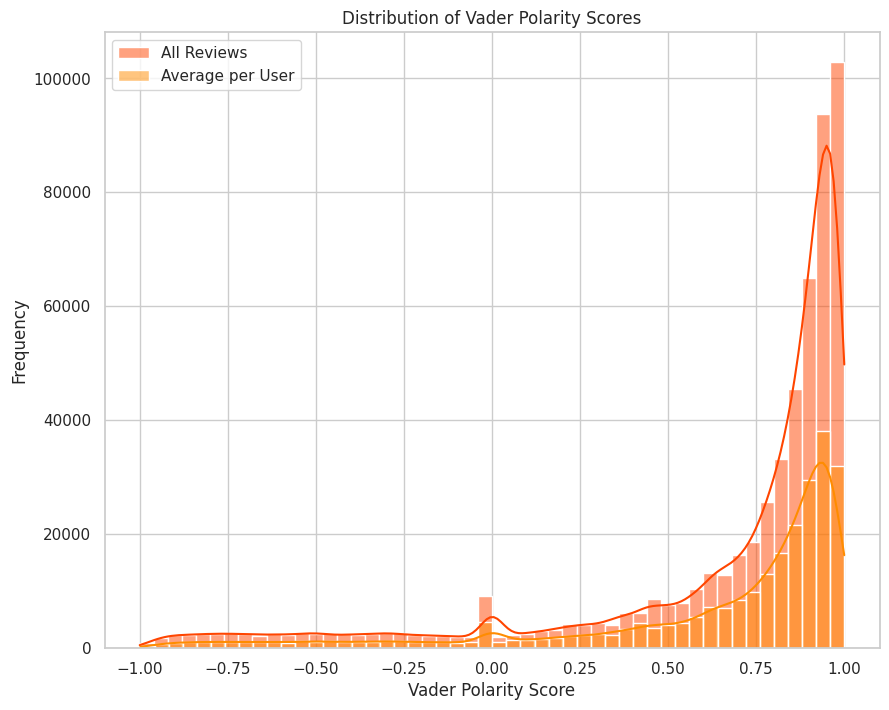

In [98]:
# prompt: Make the graph distribution of Vader polarity scores and the distribution of Average vader polarity per user combined in one graph to see that both follows the same patter, adn that one is red and the other like oragny, but one below the other

plt.figure(figsize=(10, 8))

# Plot Distribution of Vader Polarity Scores (orange/yellow)
sns.histplot(df['vader_polarity'], bins=50, kde=True, color='orangered', label='All Reviews')
plt.title("Distribution of Vader Polarity Scores")
plt.xlabel("Vader Polarity Score")
plt.ylabel("Frequency")

# Plot Distribution of Average Vader Polarity per User (red)
sns.histplot(user_sentiment_scores['vader_polarity'], bins=50, kde=True, color='darkorange', label='Average per User')

plt.legend()
plt.show()

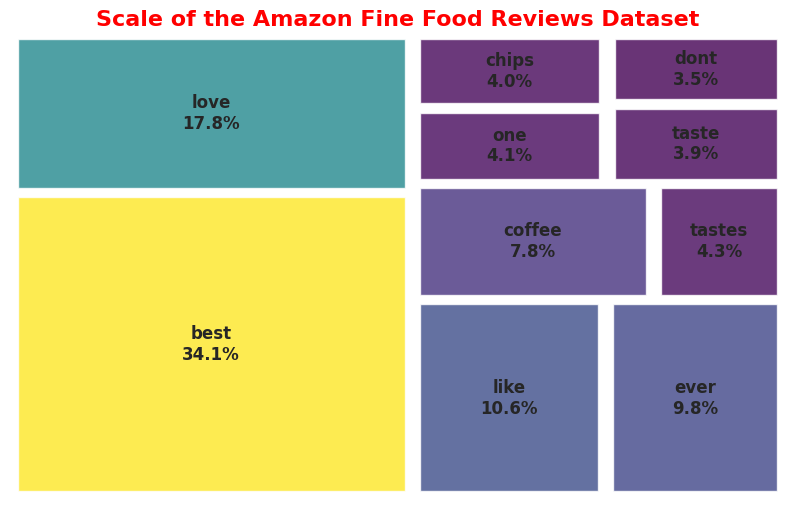

In [99]:
# prompt: make it with colour red

# Plot the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, pad=True, text_kwargs={'fontsize': 12, 'weight': 'bold'})
plt.title('Scale of the Amazon Fine Food Reviews Dataset', fontsize=16, weight='bold', color='red') # Added color='red'
plt.axis('off')
plt.show()